<a href="https://colab.research.google.com/github/RhyenSftwareEngr/SmartFarming/blob/main/SmartFarming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops





Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

**In summary, the goal of this project is to create a machine learning solution that assists farmers in selecting the most suitable crops for their fields by analyzing soil data. This approach aims to improve crop yield and optimize farming practices while taking into account budget constraints and the need to avoid multicollinearity in the data.**

In [39]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("/content/soil_measures.csv")


In [40]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [41]:
# Check for missing values
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [42]:
# Check how many crops we have, i.e., multi-class target
crops.crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    crops[["N", "P", "K", "ph"]],
    crops["crop"],
    test_size=0.2,
    random_state=42
)

We split the data into two sets: X_train and X_test containing the input features (soil measurements) and y_train and y_test containing the target variable (crop types).
The test_size parameter determines the proportion of data used for testing (20% in this case), and random_state ensures reproducibility. **bold text**

In [44]:
# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(
        max_iter=2000,
        multi_class="multinomial",
    )
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for N: 0.10143470253978322
F1-score for P: 0.12619773114809407
F1-score for K: 0.22603088906338342
F1-score for ph: 0.04532731061152114


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Explanation:

This loop iterates over each soil measurement feature (N, P, K, ph) and trains a logistic regression model for each feature individually.
It calculates the F1-score, which is a metric used to evaluate classification models, and prints the F1-score for each feature. **bold text**

In [45]:
# Calculate the correlation matrix
crops_corr = crops[["N", "P", "K", "ph"]].corr()


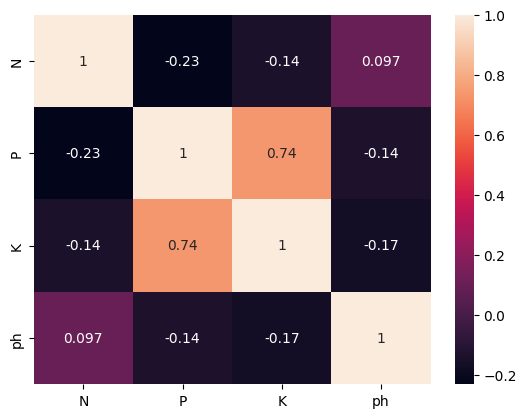

In [46]:
# Create a heatmap using seaborn
sns.heatmap(crops_corr, annot=True)
plt.show()




In [47]:
print("Correlation Matrix:")
print(crops_corr)


Correlation Matrix:
           N         P         K        ph
N   1.000000 -0.231460 -0.140512  0.096683
P  -0.231460  1.000000  0.736232 -0.138019
K  -0.140512  0.736232  1.000000 -0.169503
ph  0.096683 -0.138019 -0.169503  1.000000


In [48]:
# Select the final features for the model
final_features = ["N", "K", "ph"]

In [49]:
# Split the data with the final features
X_train, X_test, y_train, y_test = train_test_split(
    crops[final_features],
    crops["crop"],
    test_size=0.2,
    random_state=42
)




In [50]:
# Train a new model and evaluate performance

# Create a Logistic Regression model with specified settings
log_reg = LogisticRegression(
    max_iter=2000,
    multi_class="multinomial"
)

# Train the Logistic Regression model using the training data
log_reg.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = log_reg.predict(X_test)

# Calculate the model's performance using the F1-score metric
model_performance = f1_score(y_test, y_pred, average="weighted")

# Print the F1-score as a measure of the model's performance
print(f"Model Performance (F1-score): {model_performance}")


Model Performance (F1-score): 0.558010495235685


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model using the training data
random_forest.fit(X_train, y_train)  # This is the training phase

# Predict crop types on the test data
y_pred_rf = random_forest.predict(X_test)  # This is the testing phase

# Evaluate model performance using F1-score
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")
print(f"F1-score for Random Forest: {f1_rf}")


F1-score for Random Forest: 0.697748801944248


In [52]:
from ipywidgets import interact, widgets
@interact(N=(0.0, 1.0), K=(0.0, 1.0), ph=(0.0, 14.0))
def predict_crop(N=0.5, K=0.5, ph=7.0):
    # Use the model to predict the crop based on user inputs
    user_input = [[N, K, ph]]
    predicted_crop = random_forest.predict(user_input)[0]
    print(f"Recommended Crop: {predicted_crop}")


interactive(children=(FloatSlider(value=0.5, description='N', max=1.0), FloatSlider(value=0.5, description='K'…